<a href="https://colab.research.google.com/github/arunkrishnanppp/ML_School_Admission/blob/master/School_Admission_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**School Admission Prediction Using Linear Regression**

Data Used-*https://www.kaggle.com/mohansacharya/graduate-admissions*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends


Importing the Dataset

In [14]:
dataframe=pd.read_csv("Admission_Predict.csv")
#this is already in a format of padas dataframe
dataframe.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
dataframe.shape

(500, 9)

Preprosessing Of data
1) Check Null values in any of the column
2)Drop the serial No column from dataframe

In [15]:
dataframe.isnull().sum()
#this will give total number iof null values in each column

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
dataframe.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
#dropping the serial No column from dataframe

df=dataframe.drop(columns='Serial No.',axis=1)
#Axis=1 indicate that column
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
df.describe()
#Describe will give the statistical values of the dataframe

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [26]:
df.groupby('University Rating').mean()


,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


Visualizing the Data

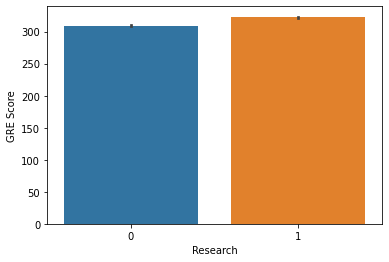

In [30]:
sns.barplot(x='Research',y='GRE Score',data=df)
#Research vs GRE score plot

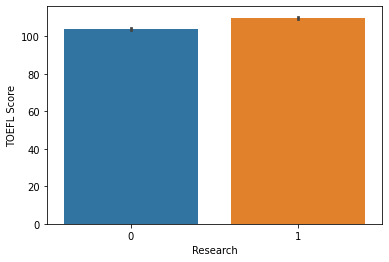

In [32]:
#Research vs TOFEL SCORE
sns.barplot(x='Research',y='TOEFL Score',data=df)


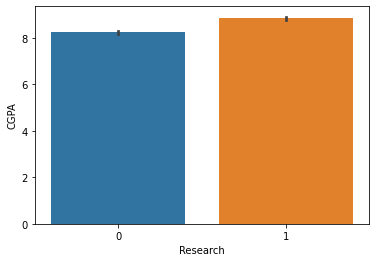

In [34]:
#Research vs CGPA 
sns.barplot(x="Research",y="CGPA",data=df)

In [35]:
#Printing the data type of each column
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [37]:
#Renaming the Colum names

df=df.rename(columns={'Serial No.':'SNO', 'GRE Score':'GRE', 'TOEFL Score':"TOFEL", 'University Rating':'UniversityRating', 'SOP':'SOP',
       'LOR ':'LOR', 'CGPA':"CGPA", 'Research':'Research', 'Chance of Admit ':'ChanceOfAdmit'})

In [38]:
df.columns

Index(['GRE', 'TOFEL', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research',
       'ChanceOfAdmit'],
      dtype='object')

In [45]:
#Printing the minimum valeu for 85% chance of admit

print(df[(df['ChanceOfAdmit']>.85)].min())

GRE                 320.00
TOFEL               108.00
UniversityRating      2.00
SOP                   3.00
LOR                   3.00
CGPA                  8.94
Research              0.00
ChanceOfAdmit         0.86
dtype: float64


Plotting graph of chance of admit

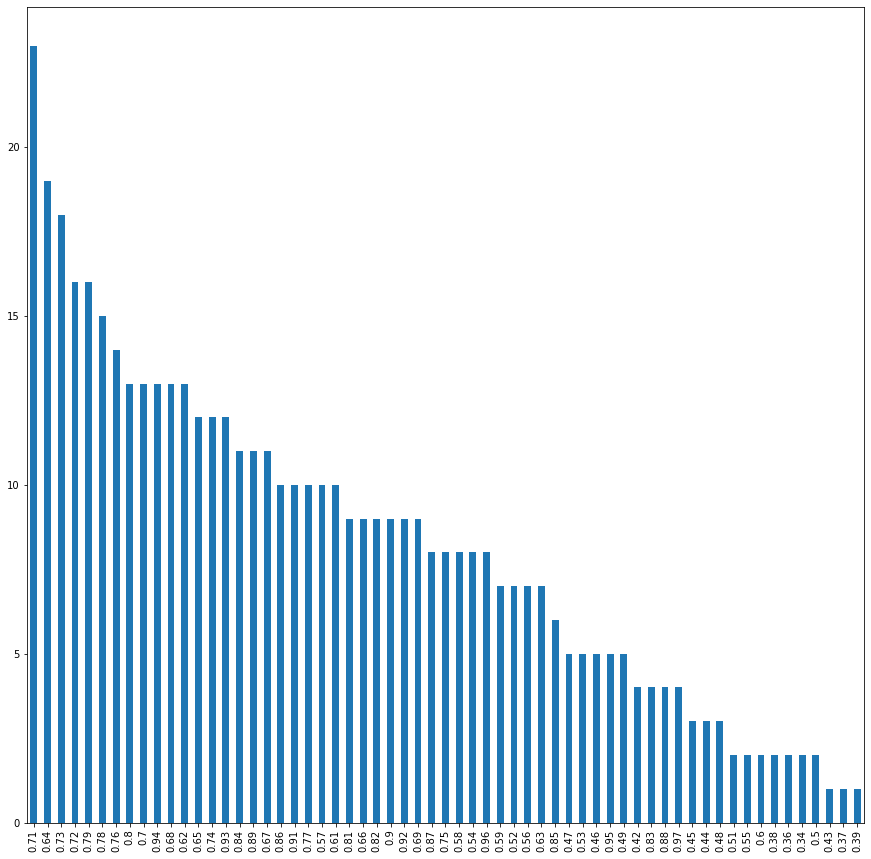

In [51]:
plt.figure(figsize=(15,15))
df['ChanceOfAdmit'].value_counts().plot.bar()

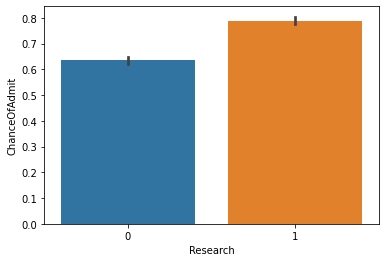

In [52]:
sns.barplot(x='Research',y='ChanceOfAdmit',data=df)
# Research vs chance of admit

In [53]:
df.corr()
#print Compute pairwise correlation of columns, excluding NA/null values.

,GRE,TOFEL,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOFEL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceOfAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Splitting the model into train and test

In [140]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
#taking the all columns except the last colmun
Y=df.iloc[:,-1]
#taking only last column




In [141]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=2)

Scaling the values usinng standardScalar

In [63]:
from sklearn.preprocessing import StandardScaler

In [142]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)



Importing Model and training using training set

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
X_train.shape

(375, 7)

Predicting accuracy on Trining set

In [145]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [146]:
y_trainPred=lr.predict(X_train)

# accuracy_score is used for only clasification problems

print("R2 Score:",r2_score(Y_train,y_trainPred))

R2 Score: 0.8303887451339371


Predicting Accuracy on Testing set

In [147]:
y_testPred=lr.predict(X_test)

print('R2 score:',r2_score(Y_test,y_testPred))

R2 score: 0.7962148198538046


Predicting on New Instance


In [148]:
inpD=(337,118,4,4.5,4.5,9.65,1)
#input data is taken as a tuple first comvert into numpy aray and then reshape it for single instance
inp=np.asarray(inpD)
input_data=inp.reshape(1,-1)
input_data=sc.transform(input_data)
input_data.shape

pred=lr.predict(input_data)
print(pred)

[0.95055118]
